<a href="https://colab.research.google.com/github/AilingLiu/Inferential_Statistics/blob/master/Non_Parametric_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import statsmodels.stats as sm
import matplotlib.pyplot as plt

Why Non Parametric Test?

1. The underlying probability distribution is unknown or deviates from what the parametric method requires
2. The sample size may be very small so that is not possible to test whether the parametric assumptions are met
3. The measurement level may be different from what the parametric methods requires. For instance, it could be ordinal.
4. There may be no parametric method available to test your specific question.

## Parametric Tests <> Non-Parametric Tests

**Parametric tests**
- Independent sample t-test
- ANOVA
- Paired sample t-test
- Pearson's R

**Non-parametric**

- Wilcoxon-Mann-Whitney U test or Mood Median test
- Kruskal-Wallis test
- Wilcoxon Signed-Rank Test
- Spearman Rank Correction or Kendall's tau

# Sign Test

Sign test is the nonparametric equivalent to the one-sample t test. This test calculates the probability of x successes or more on n trials if the true probability is p. 

> Example
<br>American elections. Two democratic nominees: Hillary Clinton and Bernie Sanders. We sampled a total of 350 American citizens from different states. In our little census, we found that 60% of our sample indicated that they would vote for Hillary Clinton. 

> Hypotheses
<br>$H_0$: There's an equal chance that an American citizen votes for Hillary Clinton or Bernie Sanders. 
<br>$H_1$: There's not an equal chance that an American citizen votes for Hillary Clinton or Bernie Sanders.

We can use [binom_test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom_test.html) function from scipy to do this test.

In [2]:
result = st.binomtest(int(350*0.6), 350, 0.5, alternative='two-sided')

print('p value is: {:.6f}'.format(result.pvalue))
if result.pvalue <=0.05:
  print(f'Smaller than significance level 0.05. Reject null hypothesis. Voting chance is not equal between two candidates.')
else:
  print(f'Greater than significance level 0.05. Fail to reject null hypothesis. There is no enough evidence to deny equal chance of vote between two candidates.')

p value is: 0.000216
Smaller than significance level 0.05. Reject null hypothesis. Voting chance is not equal between two candidates.


## The Wilcoxon Signed-Rank Test

Sometimes you will have ordinal data where people have been rating two different products and where the difference in ratings matters. In order to analyze this data, we can use A Wilcoxon signed rank test. This is the equivalent of a paired t-test.

> Example
<br>We work for a consumer goods company and we have been releasing two different beers. Our first beer is an IPA and our second is a wheat beer. We allow our test panel of customers to rate both beers on a scale from 1 - 5. We have preliminary evidence that consumers prefer our IPA to our wheat beer. 

> Hypotheses
<br>$H_0$: The beers are equally appreciated by our test panel. 
<br>$H_1$: Our IPA receives higher appreciation from our test panel than the wheat beer.

You can use [wilconxon](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.wilcoxon.html) from scipy to conduct this test.

In [3]:
score_ipa = [4,4,3,4,5,5,4,4,3,2]
score_wheat = [2,3,2,3,4,4,5,3,2,1]
beers = pd.DataFrame({'Participant': range(1, len(score_ipa)+1), 'Score IPA': score_ipa, 'Score White beer': score_wheat})
display(beers)

,Participant,Score IPA,Score White beer
0,1,4,2
1,2,4,3
2,3,3,2
3,4,4,3
4,5,5,4
5,6,5,4
6,7,4,5
7,8,4,3
8,9,3,2
9,10,2,1


In [4]:
v_val, p_value = st.wilcoxon(beers['Score IPA'], beers['Score White beer'], zero_method='wilcox', correction=True, alternative='greater')

print('p value is: {:.6f}'.format(p_value))
if p_value <=0.05:
  print(f'Smaller than significance level 0.05. Reject null hypothesis. IPA shows higher appreciate that wheat beer.')
else:
  print(f'Greater than significance level 0.05. Fail to reject null hypothesis. There is no enough evidence to deny equally appreciation of the two beers.')

p value is: 0.009766
Smaller than significance level 0.05. Reject null hypothesis. IPA shows higher appreciate that wheat beer.


# The Wilcoxon rank-sum test/Mann Whitney U Test

The Wilcoxon rank-sum test is the nonparametric equivalent of the two sample t test. Your confusion may stem from the fact that this name is really similar to the Wilcoxon signed-rank test. You can use the Wilxocon rank-sum test when you deal with two different groups and want to test whether they differ significantly. 

> Example
<br>Let's take our previous example with the IPA and wheat beer. One half of our test panel will consume the IPA. The other half of the test panel will drink the wheat beer. After, each group member will report their levels of satisfaction with the drink. We still have preliminary evidence that the IPA is associated with thigher levels of satisfaction than our wheat beer. 

> Hypotheses
<br>$H_0$: The IPA group and the wheat beer group will report equal levels of satisfaction with their drink. <br>$H_1$: The IPA group will report a higher level of satisfaction than the wheat beer group.

As the groups come from two samples, we can use either [ranksums](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html) function or [mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu). The latter one is more convenient as it can specify the alternative side, and correction whereas these to parameters need two be manually corrected in ranksums function. 

In [5]:
w_val, p_value = st.mannwhitneyu(beers['Score IPA'], beers['Score White beer'], alternative='greater')
##the returned pvalue from ranksums is a two-sided test. We need to divide p value by 2 to get one side.

print('p value is: {:.6f}'.format(p_value))
if p_value <=0.05:
  print(f'Smaller than significance level 0.05. Reject null hypothesis. IPA shows higher appreciate that wheat beer.')
else:
  print(f'Greater than significance level 0.05. Fail to reject null hypothesis. There is no enough evidence to deny equally appreciation of the two beers.')


p value is: 0.042504
Smaller than significance level 0.05. Reject null hypothesis. IPA shows higher appreciate that wheat beer.


When testing for 'two-sided', i.e. those two groups have different means, the result is as below:

In [6]:
w_val, p_value = st.mannwhitneyu(beers['Score IPA'], beers['Score White beer'], alternative='two-sided')
print(p_value)

0.08500812772757399


Given the p value is greater than 0.05, we fail the null hypothesis and conclue these these two groups have no different means. 

## Mode Median Test

In [7]:
result= st.median_test(beers['Score IPA'], beers['Score White beer'])
print(result.pvalue)

0.17971249487899593


Mode Median test can only test whether the two groups are different, not for two sided test. The null hypothesis is these two groups have different medians. 

# The Kruskall-Wallis test

Just as the comparison of means across two groups can be extended to a comparison of means across many groups, the non-parametric approach to compare mean ranks between two groups can also be extended to multiple groups. The test that does this is called the Kruskall-Wallis test which is a non-parametric counterpart of the one-way analysis of variance.

> Example
<br>We will be working with our example of beer. However, we will extend this example by introducing a third beer type that is being tested by our test panel: the amber ale. We have no preliminary evidence for which beer may be best. 

> Hypotheses
<br>$H_0$: There is no difference in satisfaction between the different beer groups. 
<br>$H_1$: There is a difference in satisfaction between the different beer groups.

We can use [kruskal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) function for this test.

In [8]:
beers['amber beer'] = [2,2,2,3,4,5,3,3,2,2]
display(beers)

,Participant,Score IPA,Score White beer,amber beer
0,1,4,2,2
1,2,4,3,2
2,3,3,2,2
3,4,4,3,3
4,5,5,4,4
5,6,5,4,5
6,7,4,5,3
7,8,4,3,3
8,9,3,2,2
9,10,2,1,2


In [9]:
h_val, p_value = st.kruskal(beers['amber beer'], beers['Score IPA'], beers['Score White beer'])

print('p value is: {:.6f}'.format(p_value))
if p_value <=0.05:
  print(f'Smaller than significance level 0.05. Reject null hypothesis. There is a appreciation difference among the beers')
else:
  print(f'Greater than significance level 0.05. Fail to reject null hypothesis. There is no enough evidence to deny equally appreciation of the three beers.')

p value is: 0.075376
Greater than significance level 0.05. Fail to reject null hypothesis. There is no enough evidence to deny equally appreciation of the three beers.


# Spearman Rank Correction

The Spearman correlation coefficient is a good replacement of the Pearson correlation if one of these conditions applies to your variables:

* they are not numerical but one or both of the variables are ordinal
* they are not linearly related
* they contain one or more outliers or
* they don't follow a bivariate normal distribution or you cannot check this due to lack of data.

You can interpret the Spearman correlation in the same fashion as the Pearson
correlation coefficients. a ρ of smaller than 0 denotes a negative relationship while a ρ of larger than 0 denotes a positive relationship. There are quite many way to calculate the spearman rank coefficient. [Check here](https://cmdlinetips.com/2019/08/how-to-compute-pearson-and-spearman-correlation-in-python/) for details.

<Axes: xlabel='Ingredients', ylabel='Price'>

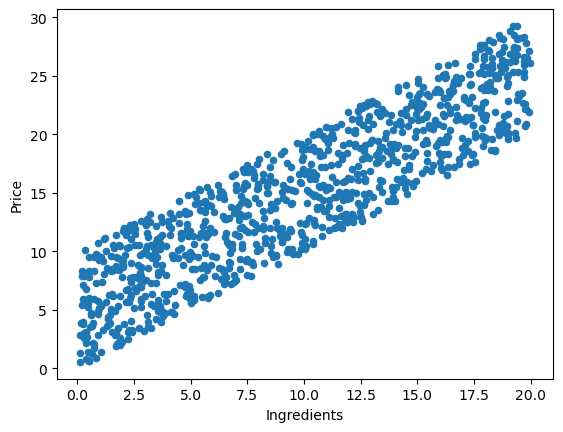

In [10]:
np.random.seed(42)
data1 = np.random.rand(1000) * 20
data2 = data1 + (np.random.rand(1000) * 10)
sales = pd.DataFrame({'Ingredients': data1, 'Price': data2})
sales.plot.scatter('Ingredients', 'Price')

In [11]:
#solution 1
sales['Ingred_rank'] = sales['Ingredients'].rank()
sales['Price_rank'] = sales['Price'].rank()
spearman_coef = np.corrcoef(sales['Ingred_rank'], sales['Price_rank'])
print(spearman_coef[0][1])

0.9024128784128784


In [12]:
#solution 2
rho, p_val = st.spearmanr(sales[['Ingredients', 'Price']]) 
print(rho)

0.9024128784128784


In [13]:
#solution 3
sales['Ingredients'].corr(sales['Price'], method='spearman')

0.9024128784128784

## Kendall's tau

Kendall's tau

- Values between -1 and 1
- $\tau$ = -1: Complete disagreement
- $\tau$ = 0: No correlation
- $\tau$ = 1: Complete agreement

In [14]:
result = st.kendalltau(sales['Ingredients'], sales['Price'])
print(result.statistic)
print(result.pvalue)

0.7132332332332333
4.995946456306656e-250


Given tau ~ 0.71, and P value is less than 0.05, these two variables are correlated.